In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
y = np.array([0,1,3,3,2])

one-hot encoding

In [6]:
Y = np.zeros((len(y), 4))
for i in range(len(y)):
    Y[i][y[i]] = 1
Y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Use Numpy only

In [13]:
np.eye(4)[y]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [22]:
Y = np.zeros((len(y), 4))
Y[np.arange(5), y] = 1
Y
### row 0 has one at y[0]
### row 1 has one at y[1]
### [0,1,2,3,4] [y[0], y[1], ..., y[4]] = y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Use pandas

In [23]:
s = pd.Series(y)
pd.get_dummies(s)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


Use sklearn

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# enc.fit(y[:, np.newaxis])
# y_model = enc.transform(y[:, np.newaxis])
y_model = enc.fit_transform(y[:, np.newaxis])
y_model.toarray()

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

For digit recognition,  
`y = [0,1, ..., 9]`

In [35]:
names = np.array(['A']*50 + ['B']*50 + ['C']*50)
prices = np.concatenate([
        100 + np.random.randn(50), 
        300 + np.random.randn(50), 
        200 + np.random.randn(50), 
    ])
X = names[:, np.newaxis]
y = prices
print(X.shape)
print(y.shape)

(150, 1)
(150,)


Ordinal encoding  
transform `n` discrete categories into `0, ..., n-1`   
'A' -> 0  
'B' -> 1  
'C' -> 2

In [37]:
from sklearn.preprocessing import OrdinalEncoder
### similar to LabelEncoder
enc = OrdinalEncoder()
new_X = enc.fit_transform(X)
print(new_X.shape)

(150, 1)


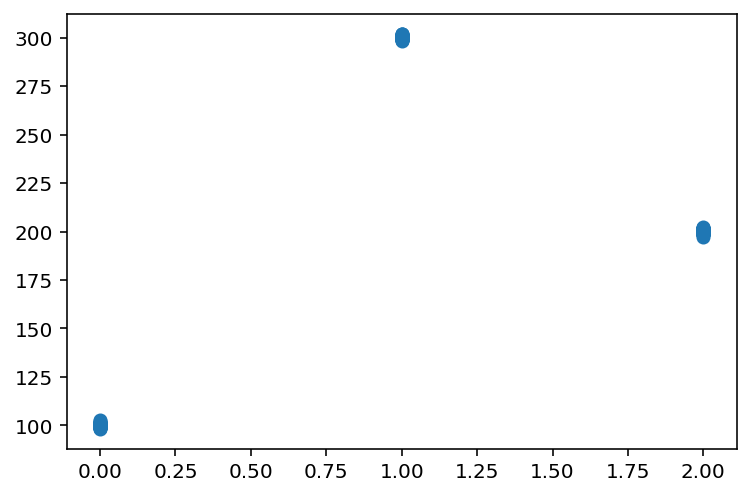

In [40]:
plt.scatter(new_X[:, 0], y)

In [41]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(OneHotEncoder(), 
                     LinearRegression(fit_intercept=False))
pipe.fit(new_X, y)
y_model = pipe.predict(new_X)
print(y_model.shape)

(150,)


/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
pipe.steps[1][1].coef_

array([100.10539971, 300.23989847, 200.04140741])

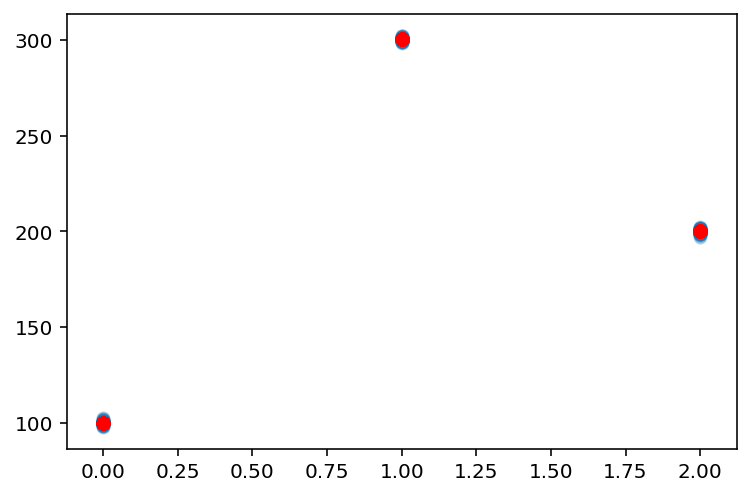

In [45]:
plt.scatter(new_X[:,0], y, alpha=0.3)
plt.scatter(new_X[:,0], y_model, color='red')

In [47]:
import sklearn

In [48]:
sklearn.__version__

'0.21.3'

If necessary, upgrade your sklearn by 
```Python
pip install --upgrade scikit-learn --user
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.naive_bayes import GaussianNB

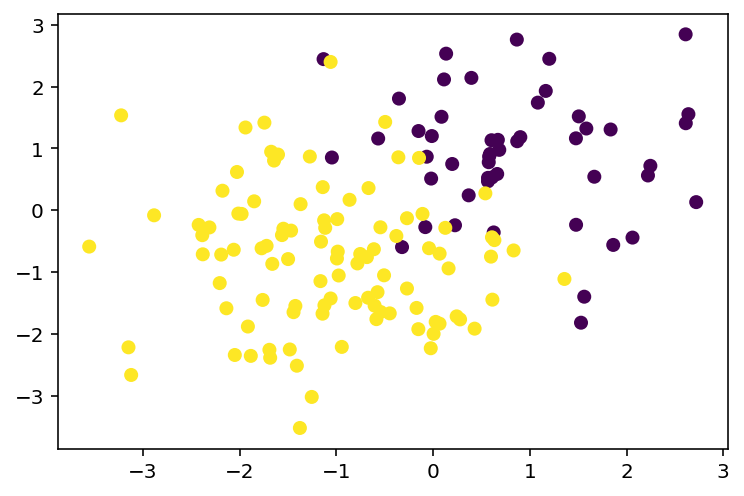

In [11]:
X = np.concatenate([
        np.array([1,1]) + np.random.randn(50,2),
        np.array([-1,-1]) + np.random.randn(100,2),
    ])
y = np.array([0]*50 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [12]:
model = GaussianNB()
model.fit(X, y)
y_model = model.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.92

In [18]:
X_dense = np.random.rand(1000,2) * 8 - 4 
y_model = model.predict(X_dense)

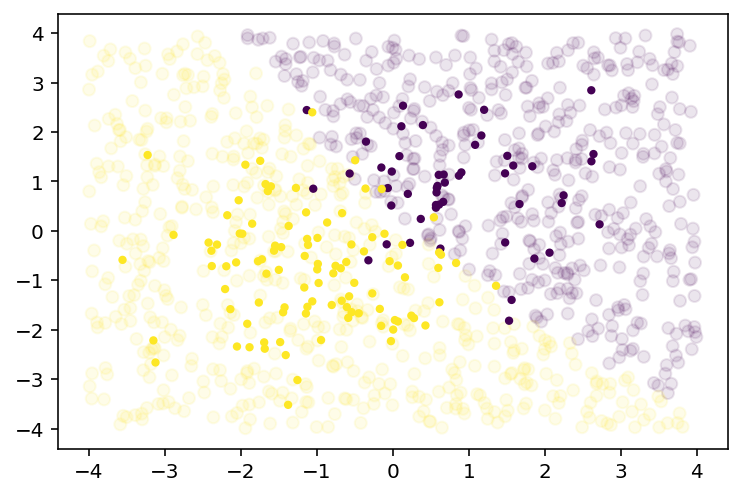

In [21]:
plt.scatter(X_dense[:,0], X_dense[:,1], c=y_model, cmap='viridis', alpha=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap='viridis')

$P(L|feature) = \frac{P(feature|L)P(L)}{P(feature)}$

$P(L=purple)$, $P(L=yellow)$

In [22]:
model.class_prior_

array([0.33333333, 0.66666667])

In [23]:
model.theta_

array([[ 0.84375026,  0.91275923],
       [-1.06494183, -0.79530273]])

In [24]:
model.sigma_

array([[0.87982364, 0.982205  ],
       [0.95628072, 1.18119755]])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

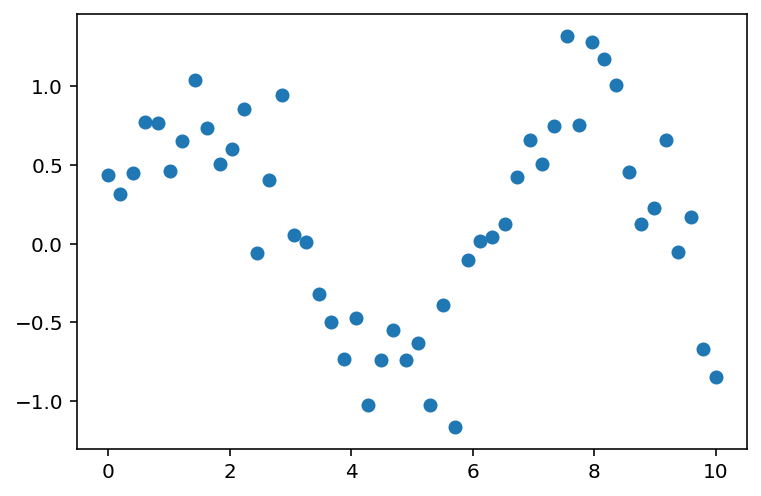

In [19]:
x = np.linspace(0, 10, 50)
X = x[:, np.newaxis]
y = np.sin(x) + 0.3*np.random.randn(50)
plt.scatter(x, y)

In [7]:
change = GaussianFeatures(30)
change.fit(X)
X_new = change.transform(X)

In [9]:
print(X.shape)
print(X_new.shape)

(50, 1)
(50, 30)


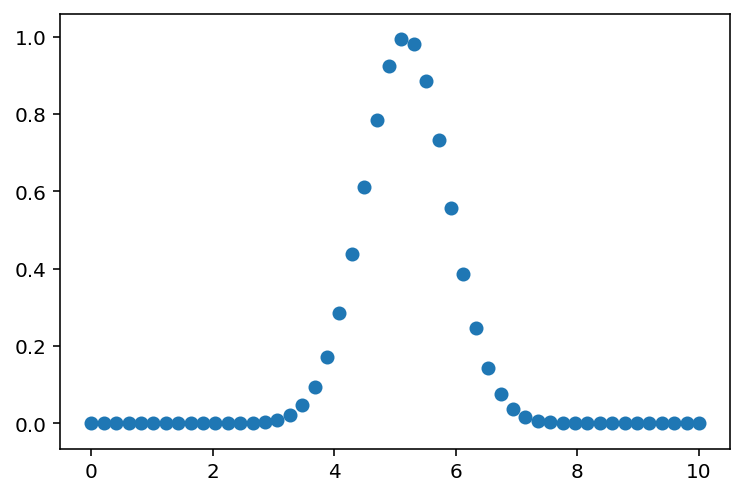

In [15]:
plt.scatter(X[:,0], X_new[:,15])

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.pipeline import make_pipeline

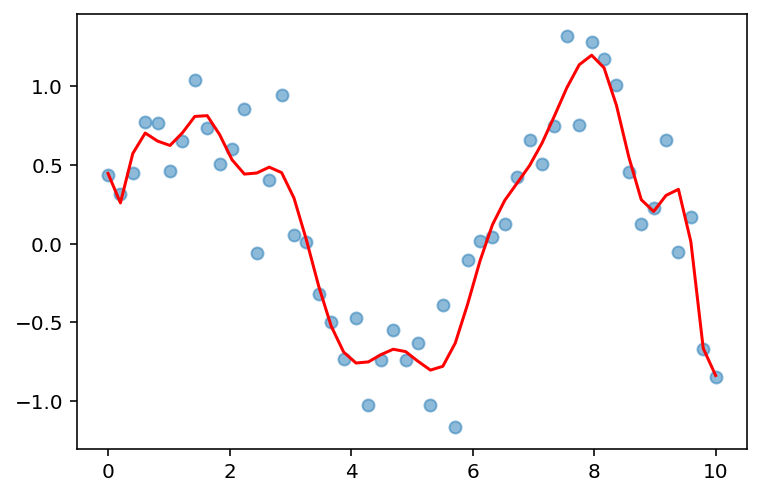

In [27]:
pipe = make_pipeline(GaussianFeatures(20), 
                     LinearRegression())
pipe.fit(X, y)
y_model = pipe.predict(X)

plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_model, color='red')

In [30]:
from sklearn.linear_model import Ridge

**linear regression**  
error = sum of |yi - f(xi)|^2  
**ridge regression**  
error + alpha * sum of all coefficients^2  
**Lasso regression**  
error + alpha * sum of all |coefficients|  

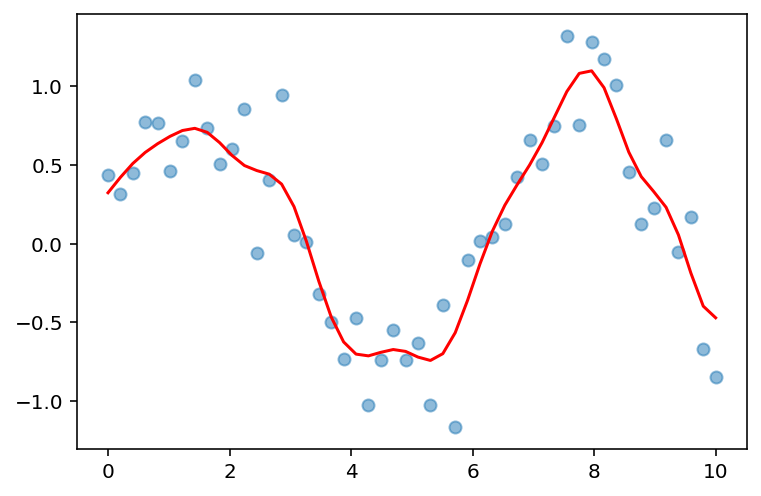

In [33]:
pipe = make_pipeline(GaussianFeatures(50), 
                     Ridge(alpha=1))
pipe.fit(X, y)
y_model = pipe.predict(X)

plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_model, color='red')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one-hot encoding

In [13]:
y = np.array([0,1,3,3,2])
len(y)

5

In [4]:
Y = np.zeros((5,4))
for i in range(5):
    j = y[i]
    Y[i][j] = 1

Y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Using Numpy

In [9]:
np.eye(4)[y]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [12]:
Y = np.zeros((5,4))
Y[np.arange(5), y] = 1

Y
### [0, 1, 2, 3, 4], [0, 1, 3, 3, 2]
### np.range(5), y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Using pandas

In [14]:
s = pd.Series(y)
pd.get_dummies(s)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


Using sklearn

In [19]:
from sklearn.preprocessing import OneHotEncoder
change = OneHotEncoder()
Y = change.fit_transform(y[:, np.newaxis])
Y.toarray()

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [20]:
y

array([0, 1, 3, 3, 2])

In [24]:
names = np.array(['A']*50 + ['B']*50 + ['C']*50)
prices = np.concatenate([
        100 + np.random.randn(50), 
        300 + np.random.randn(50), 
        200 + np.random.randn(50), 
    ])
X = names[:, np.newaxis]
y = prices
print(X.shape)
print(y.shape)

(150, 1)
(150,)


Ordinal encoding:  
change strings to labels 0, ..., n-1

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
new_X = enc.fit_transform(X)
print(new_X.shape)

(150, 1)


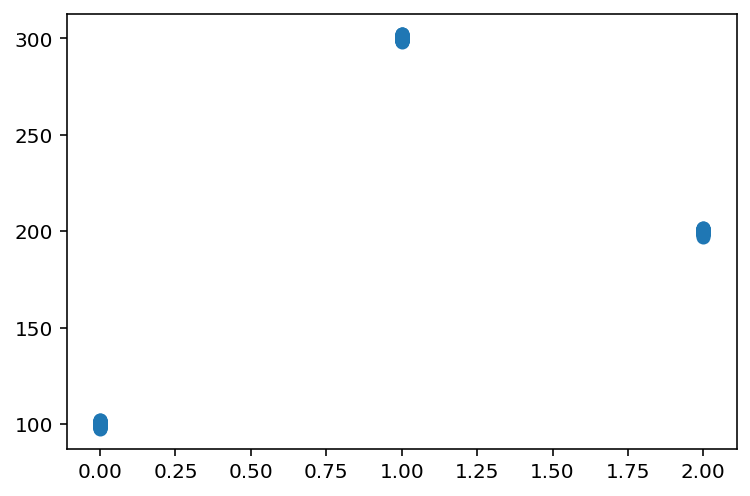

In [32]:
plt.scatter(new_X[:, 0], y)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [39]:
pipe = make_pipeline(OneHotEncoder(), 
                     LinearRegression(fit_intercept=False))
pipe.fit(new_X, y)
y_model = pipe.predict(new_X)

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


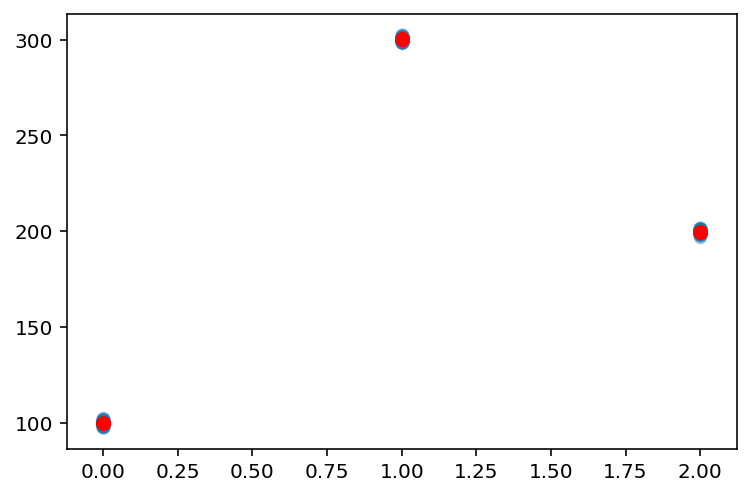

In [40]:
plt.scatter(new_X[:,0], y, alpha=0.3)
plt.scatter(new_X[:,0], y_model, color='red')

In [42]:
pipe.steps[1][1].coef_

array([ 99.88513626, 300.14723527, 199.83192079])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
import sklearn

In [45]:
sklearn.__version__

'0.21.3'

To upgrade sklearn  
```Python
pip install --upgrade scikit-learn --user
pip3 install --upgrade scikit-learn --user
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

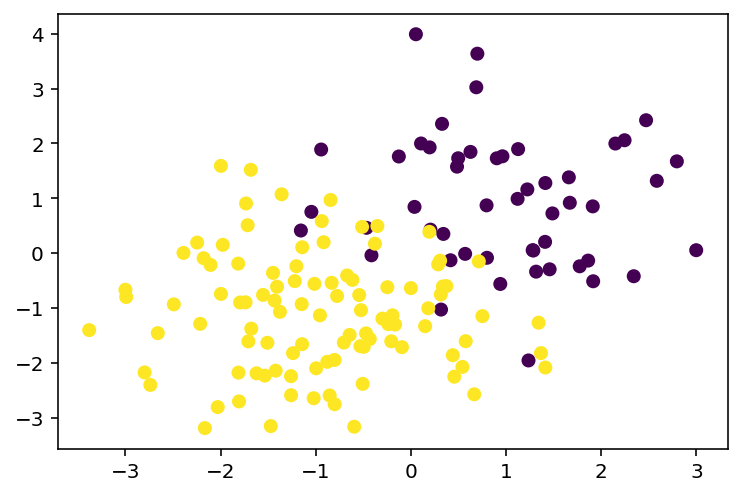

In [3]:
X = np.concatenate([
        np.array([1,1]) + np.random.randn(50,2),
        np.array([-1,-1]) + np.random.randn(100,2),
    ])
y = np.array([0]*50 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
model.class_prior_ ### P(L)

array([0.33333333, 0.66666667])

In [6]:
model.theta_ ### the means for each class

array([[ 0.97122831,  0.93425024],
       [-0.95191934, -1.09225375]])

In [7]:
model.sigma_ ### the variances for each class and each axes

array([[0.92694876, 1.37126441],
       [1.02742642, 1.11179759]])

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
y_model = model.predict(X)
accuracy_score(y, y_model)

0.9466666666666667

In [17]:
X_dense = np.random.rand(500, 2) * 8 - 4
y_model = model.predict(X_dense)

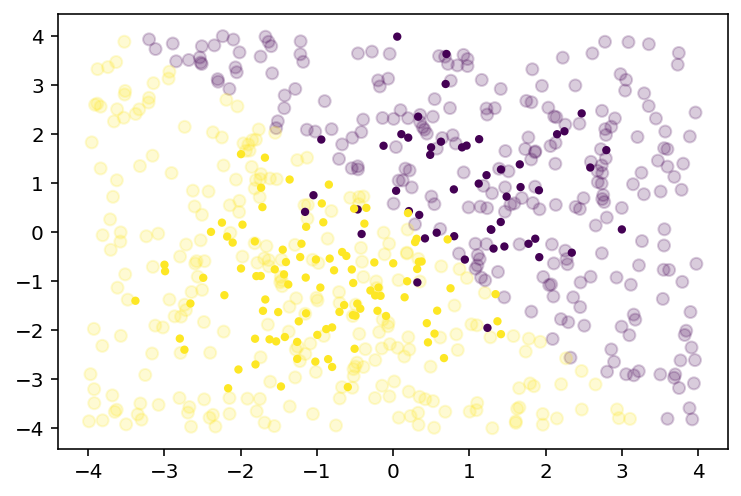

In [20]:
plt.scatter(X_dense[:,0], X_dense[:,1], c=y_model, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

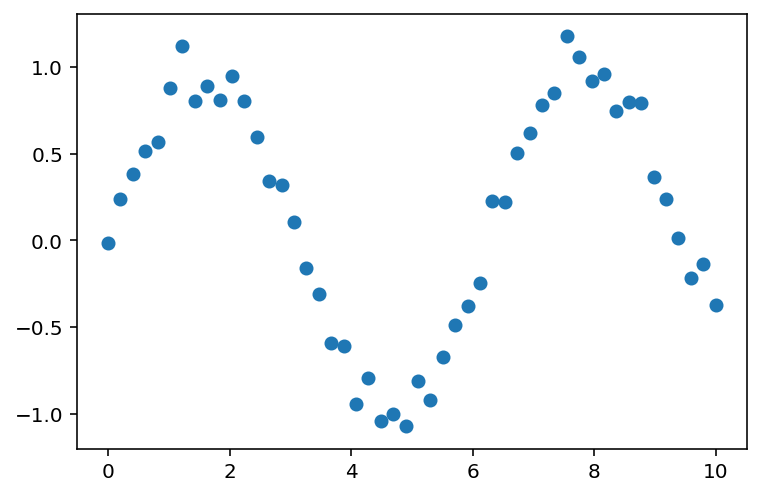

In [6]:
### create data
x = np.linspace(0, 10, 50)
X = x[:, np.newaxis]
y = np.sin(x) + 0.1*np.random.randn(50)
plt.scatter(x, y)

In [8]:
change = GaussianFeatures(20)
change.fit(X)
new_X = change.transform(X)
print(X.shape)
print(new_X.shape)

(50, 1)
(50, 20)


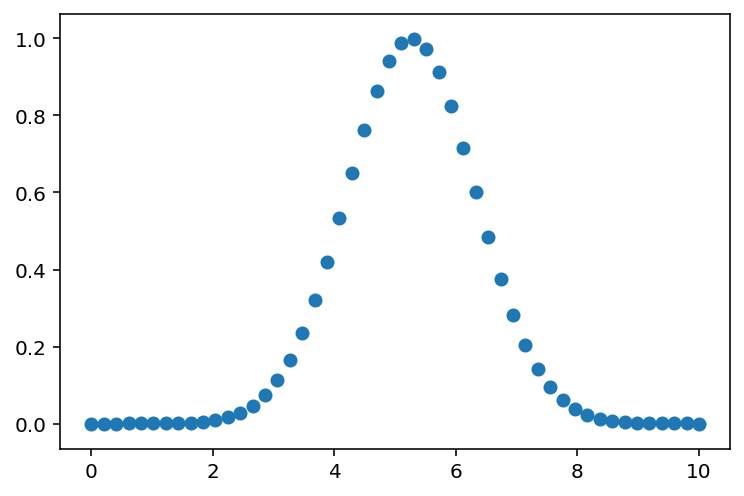

In [15]:
plt.scatter(X[:,0], new_X[:,10])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

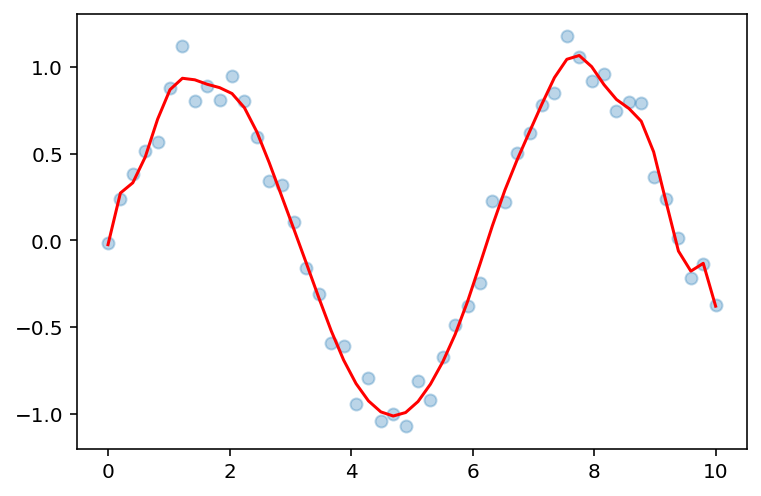

In [19]:
pipe = make_pipeline(GaussianFeatures(20), 
                     LinearRegression())
pipe.fit(X, y)
y_model = pipe.predict(X)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')

In [22]:
from sklearn.linear_model import Ridge ### or Lasso

**linear regression**  
minimize error = sum of |yi - f(xi)|^2  
**ridge regression**  ### L2-norm    
minimize error + alpha * sum of (coefficient)^2    
**Lasso regression**  ### L1-norm    
minimize error + alpha * sum of |coefficient|  
Lasso will bring coefficients to zero faster (in general)  

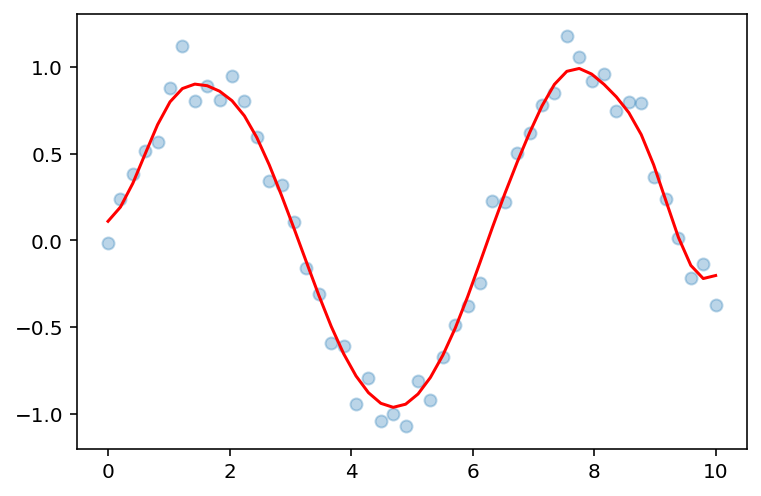

In [29]:
pipe = make_pipeline(GaussianFeatures(50), 
                     Ridge(alpha=1))
pipe.fit(X, y)
y_model = pipe.predict(X)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_model, color='red')